In [1]:
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_excel('Final Autism Dataset.xlsx')

In [ ]:
dataset.head(5)

,age,gender,level_ASD,speak_verbally,follow_instruction,maintain_interaction,socialize_other_children,eye_contact,role_playing,facial_expression,understand_others_feeling,look_at_pointed_toys,respond_when_called,keep_attention,interest_in_gadget,behaviour,parents_objective_1,plan_therapy_1
0,6-9,Male,Level 1,Sometimes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Tantrum,Speech,Occupational
1,6-9,Male,Level 1,Sometimes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Ocd,Reduce Hyperactive,Behaviour
2,Below 6,Male,Level 1,No,Yes,Yes,No,Sometimes,Yes,Yes,No,Yes,Yes,Sometimes,Yes,Tantrum,Speech,Speech
3,Below 6,Male,Level 1,Sometimes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Sometimes,Yes,Tantrum,Eye Contact,Not Specified
4,Below 6,Female,Level 2,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Not specified,Too Sensitive,Social Anxiety,Social Anxiety


In [4]:
dataset.isnull().sum()


age                          0
gender                       0
level_ASD                    0
speak_verbally               0
follow_instruction           0
maintain_interaction         0
socialize_other_children     0
eye_contact                  0
role_playing                 0
facial_expression            0
understand_others_feeling    0
look_at_pointed_toys         0
respond_when_called          0
keep_attention               0
interest_in_gadget           0
behaviour                    0
parents_objective_1          0
plan_therapy_1               0
dtype: int64

In [5]:
dataset.describe()

,age,gender,level_ASD,speak_verbally,follow_instruction,maintain_interaction,socialize_other_children,eye_contact,role_playing,facial_expression,understand_others_feeling,look_at_pointed_toys,respond_when_called,keep_attention,interest_in_gadget,behaviour,parents_objective_1,plan_therapy_1
count,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225
unique,3,2,3,3,3,3,3,3,3,3,3,3,3,4,3,6,11,9
top,Below 6,Male,Level 1,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Sometimes,Not specified,Tantrum,Speech,Occupational
freq,138,179,150,112,144,122,139,89,134,175,147,157,154,118,121,119,72,60


In [6]:
dataset.nunique()

age                           3
gender                        2
level_ASD                     3
speak_verbally                3
follow_instruction            3
maintain_interaction          3
socialize_other_children      3
eye_contact                   3
role_playing                  3
facial_expression             3
understand_others_feeling     3
look_at_pointed_toys          3
respond_when_called           3
keep_attention                4
interest_in_gadget            3
behaviour                     6
parents_objective_1          11
plan_therapy_1                9
dtype: int64

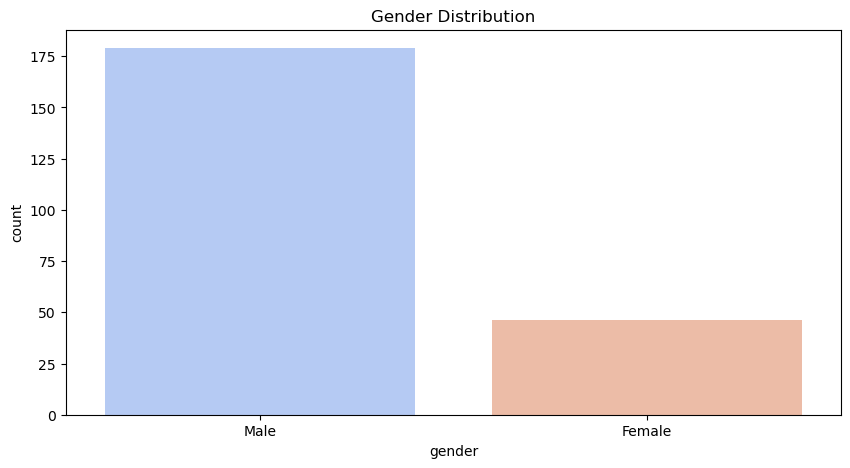

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='gender', data=dataset, palette='coolwarm')
plt.title('Gender Distribution')
plt.show()

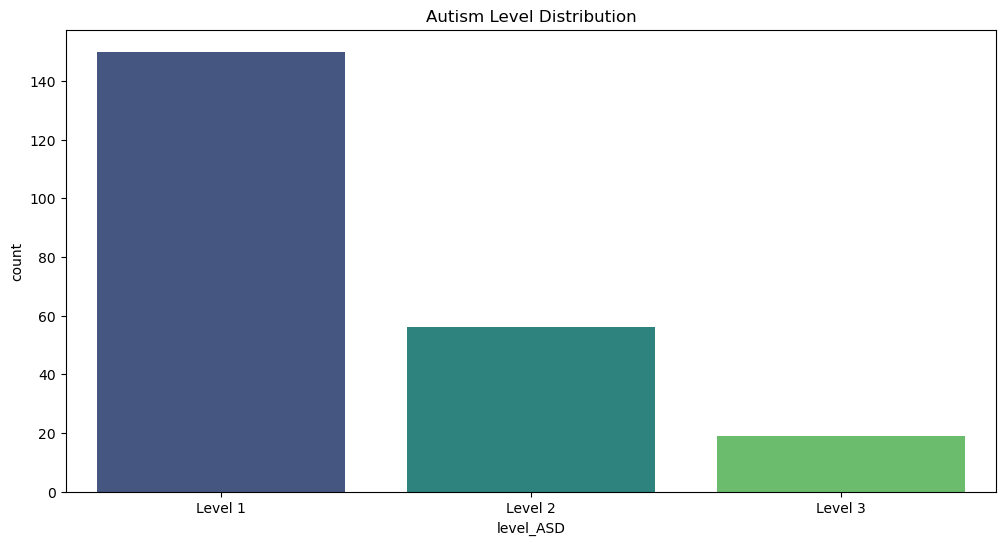

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='level_ASD', data=dataset, palette='viridis')
plt.title('Autism Level Distribution')
plt.show()


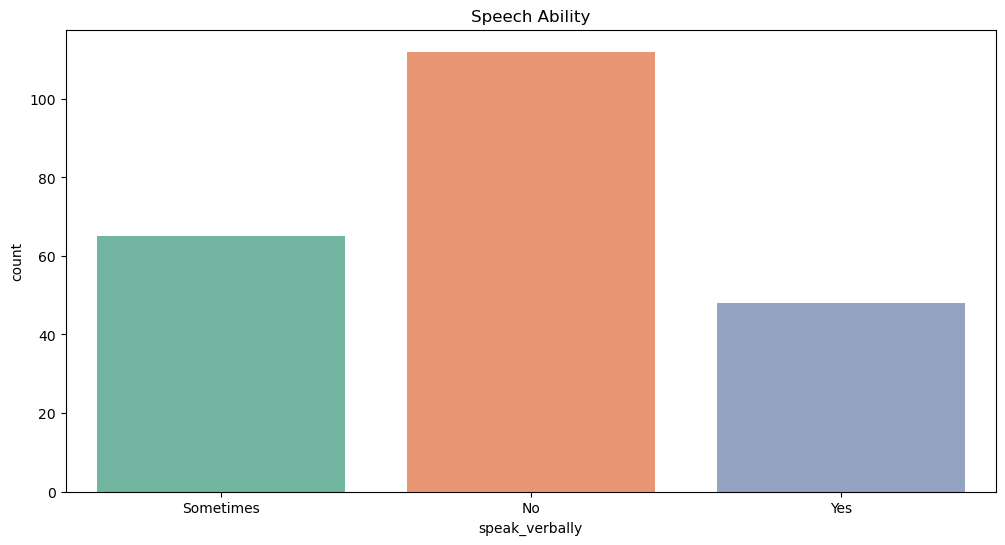

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='speak_verbally', data=dataset, palette='Set2')
plt.title('Speech Ability')
plt.show()

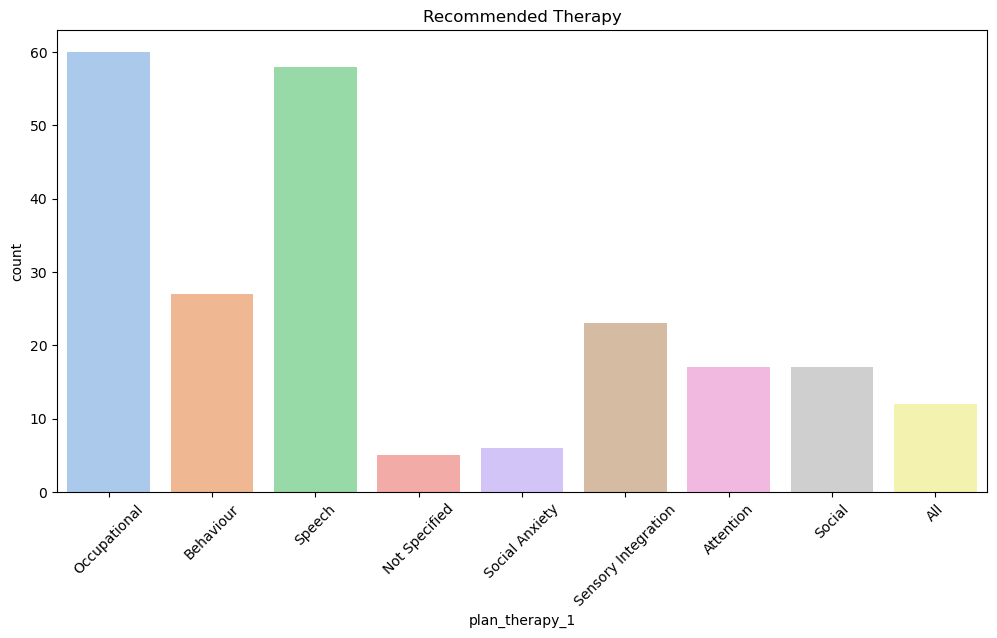

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='plan_therapy_1', data=dataset, palette='pastel')
plt.title('Recommended Therapy')
plt.xticks(rotation=45)
plt.show()

In [11]:
therapy_autism_ct = pd.crosstab(dataset['level_ASD'], dataset['plan_therapy_1'])
print("\nAutism Level vs Therapy Plan:\n", therapy_autism_ct)


Autism Level vs Therapy Plan:
 plan_therapy_1  All  Attention  Behaviour  Not Specified  Occupational  \
level_ASD                                                                
Level 1           3         10         15              4            42   
Level 2           5          4          9              1            15   
Level 3           4          3          3              0             3   

plan_therapy_1  Sensory Integration  Social  Social Anxiety  Speech  
level_ASD                                                            
Level 1                          17      12               1      46  
Level 2                           6       2               3      11  
Level 3                           0       3               2       1  



Correlation of All Features with Target Column:

                      Feature  Correlation
6    socialize_other_children     0.414951
12        respond_when_called     0.371012
0                         age     0.358697
13             keep_attention     0.354792
4          follow_instruction     0.336502
8                role_playing     0.329356
15                  behaviour     0.315808
3              speak_verbally     0.307299
10  understand_others_feeling     0.306569
5        maintain_interaction     0.305806
11       look_at_pointed_toys     0.270019
9           facial_expression     0.228510
16        parents_objective_1     0.221934
2                   level_ASD     0.215310
7                 eye_contact     0.172170
14         interest_in_gadget     0.112000
1                      gender     0.000000


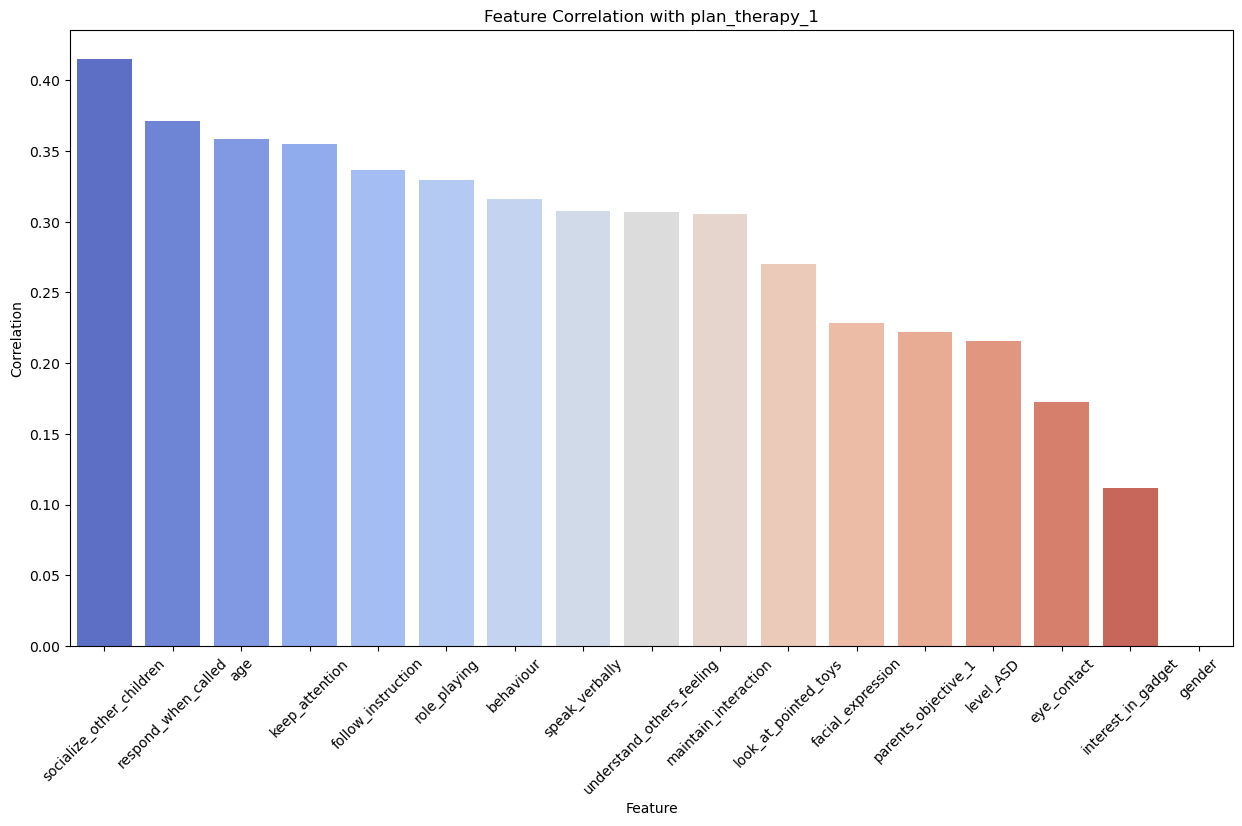

In [12]:
from scipy.stats import chi2_contingency, spearmanr

target_col = "plan_therapy_1"  

df_encoded = dataset.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))

correlation_results = {}

for col in df_encoded.columns:
    if col != target_col: 
        if df_encoded[col].nunique() > 10: 
            correlation, _ = spearmanr(df_encoded[col], df_encoded[target_col])
        else:
            correlation = cramers_v(df_encoded[col], df_encoded[target_col])
        
        correlation_results[col] = correlation

correlation_df = pd.DataFrame(list(correlation_results.items()), columns=["Feature", "Correlation"])
correlation_df = correlation_df.sort_values(by="Correlation", ascending=False)

print("\nCorrelation of All Features with Target Column:\n")
print(correlation_df)

plt.figure(figsize=(15, 8))
sns.barplot(x=correlation_df["Feature"], y=correlation_df["Correlation"], palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Correlation")
plt.title(f"Feature Correlation with {target_col}")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

important_features = [
    "socialize_other_children",
    "respond_when_called",
    "age",
    "keep_attention",
    "follow_instruction",
    "role_playing",
    "behaviour",
    "speak_verbally",
    "understand_others_feeling",
    "maintain_interaction",
    "look_at_pointed_toys",
    "facial_expression",
    "parents_objective_1",
    "level_ASD",
    "eye_contact"
]



In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        225 non-null    object
 1   gender                     225 non-null    object
 2   level_ASD                  225 non-null    object
 3   speak_verbally             225 non-null    object
 4   follow_instruction         225 non-null    object
 5   maintain_interaction       225 non-null    object
 6   socialize_other_children   225 non-null    object
 7   eye_contact                225 non-null    object
 8   role_playing               225 non-null    object
 9   facial_expression          225 non-null    object
 10  understand_others_feeling  225 non-null    object
 11  look_at_pointed_toys       225 non-null    object
 12  respond_when_called        225 non-null    object
 13  keep_attention             225 non-null    object
 14  interest_i

In [15]:
dataset["age"] = pd.to_numeric(dataset["age"], errors="coerce")  # Convert to numeric



In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in dataset.columns:  
    dataset[col] = le.fit_transform(dataset[col])  # Convert categorical to numbers


In [17]:
dataset = pd.get_dummies(dataset, columns=["gender", "level_ASD"], drop_first=True)  


In [18]:
dataset.head()

,age,speak_verbally,follow_instruction,maintain_interaction,socialize_other_children,eye_contact,role_playing,facial_expression,understand_others_feeling,look_at_pointed_toys,respond_when_called,keep_attention,interest_in_gadget,behaviour,parents_objective_1,plan_therapy_1,gender_1,level_ASD_1,level_ASD_2
0,0,1,2,2,2,2,0,2,2,2,2,3,2,4,10,4,True,False,False
1,0,1,2,2,2,2,0,2,0,2,2,0,2,3,6,2,True,False,False
2,0,0,2,2,0,1,2,2,0,2,2,2,2,4,10,8,True,False,False
3,0,1,2,0,2,0,2,2,0,2,2,2,2,4,2,3,True,False,False
4,0,0,2,2,2,0,2,2,0,2,2,0,1,5,9,7,False,True,False


In [19]:
dataset.isnull().sum()

age                          0
speak_verbally               0
follow_instruction           0
maintain_interaction         0
socialize_other_children     0
eye_contact                  0
role_playing                 0
facial_expression            0
understand_others_feeling    0
look_at_pointed_toys         0
respond_when_called          0
keep_attention               0
interest_in_gadget           0
behaviour                    0
parents_objective_1          0
plan_therapy_1               0
gender_1                     0
level_ASD_1                  0
level_ASD_2                  0
dtype: int64

In [20]:
important_features = [
    "socialize_other_children",
    "respond_when_called",
    "age",
    "keep_attention",
    "follow_instruction",
    "role_playing",    "behaviour",
    "speak_verbally",
    "understand_others_feeling",
    "maintain_interaction",
    "look_at_pointed_toys",
    "facial_expression",
    "parents_objective_1",
    "level_ASD_1",
    "level_ASD_2",
    "eye_contact"
]

In [21]:
X = dataset.drop(['plan_therapy_1'],axis=1)
y = dataset["plan_therapy_1"] 

In [22]:
X

,age,speak_verbally,follow_instruction,maintain_interaction,socialize_other_children,eye_contact,role_playing,facial_expression,understand_others_feeling,look_at_pointed_toys,respond_when_called,keep_attention,interest_in_gadget,behaviour,parents_objective_1,gender_1,level_ASD_1,level_ASD_2
0,0,1,2,2,2,2,0,2,2,2,2,3,2,4,10,True,False,False
1,0,1,2,2,2,2,0,2,0,2,2,0,2,3,6,True,False,False
2,0,0,2,2,0,1,2,2,0,2,2,2,2,4,10,True,False,False
3,0,1,2,0,2,0,2,2,0,2,2,2,2,4,2,True,False,False
4,0,0,2,2,2,0,2,2,0,2,2,0,1,5,9,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0,2,1,0,1,2,1,2,1,2,0,3,1,2,4,True,False,True
221,0,2,1,0,1,2,1,2,1,2,0,3,1,2,4,True,False,True
222,0,0,0,0,0,1,0,0,1,0,1,2,1,2,4,False,False,False
223,0,2,0,0,1,1,1,1,2,0,0,2,1,2,4,True,True,False


In [23]:
y


0      4
1      2
2      8
3      3
4      7
      ..
220    0
221    0
222    4
223    4
224    2
Name: plan_therapy_1, Length: 225, dtype: int32

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_test.head()

,age,speak_verbally,follow_instruction,maintain_interaction,socialize_other_children,eye_contact,role_playing,facial_expression,understand_others_feeling,look_at_pointed_toys,respond_when_called,keep_attention,interest_in_gadget,behaviour,parents_objective_1,gender_1,level_ASD_1,level_ASD_2
9,0,0,2,2,2,2,2,2,0,2,2,2,2,4,1,1,1,0
184,0,2,2,1,0,1,1,2,1,0,1,2,1,2,4,1,0,0
120,0,2,2,2,2,2,2,2,2,2,2,2,1,1,4,1,0,0
207,0,2,2,1,1,1,1,1,2,0,1,2,1,2,4,1,0,0
148,0,0,2,0,2,1,2,2,2,2,2,0,2,1,10,1,0,0


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

X = X.copy()
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

X_np = X.to_numpy().astype(float)
y_np = y.to_numpy()  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_np)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_np, test_size=0.2, random_state=42, stratify=y_np)


smote = SMOTE(random_state=42, k_neighbors=2)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


classes = np.unique(y_train_sm)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_sm)
class_weight_dict = dict(zip(classes, weights))


rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
svm = SVC(probability=True, kernel='linear', random_state=42, class_weight='balanced')
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)


voting_model = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('svm', svm)],
    voting='soft'
)


voting_model.fit(X_train_sm, y_train_sm)


y_pred_train = voting_model.predict(X_train_sm)
y_pred_test = voting_model.predict(X_test)


print("Training Accuracy:", accuracy_score(y_train_sm, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:41:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.9953703703703703
Testing Accuracy: 0.6222222222222222

Confusion Matrix:
 [[ 1  0  0  0  0  0  1  0  0]
 [ 0  2  1  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  1  3  0  4  1  3  0  0]
 [ 0  0  0  0  0  5  0  0  0]
 [ 0  0  0  1  2  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  2  0  0  0 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      0.67      0.67         3
           2       0.60      1.00      0.75         6
           3       0.00      0.00      0.00         1
           4       0.40      0.33      0.36        12
           5       0.83      1.00      0.91         5
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       1.00      0.83      0.91        12

    accuracy                           0.62        45
   macro avg 

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
svm = SVC(probability=True, kernel='linear', random_state=42)

meta_classifier = LogisticRegression()

stacked_model = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('svm', svm)],
    final_estimator=meta_classifier
)

stacked_model.fit(X_train, y_train)

train_pred = stacked_model.predict(X_train)
test_pred = stacked_model.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
conf_matrix = confusion_matrix(y_test, test_pred)
class_report = classification_report(y_test, test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:41:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:41:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_lab

Training Accuracy: 0.8722
Testing Accuracy: 0.6667

Confusion Matrix:
[[1 0 0 0 1 0 0 0 0]
 [0 2 1 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 2 2 0 7 1 0 0 0]
 [0 0 0 0 0 5 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 3 0 0 0 9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      0.67      0.57         3
           2       0.67      1.00      0.80         6
           3       0.00      0.00      0.00         1
           4       0.44      0.58      0.50        12
           5       0.83      1.00      0.91         5
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       1.00      0.75      0.86        12

    accuracy                           0.67        45
   macro avg       0.49      0.50      0.48        45
weighted avg       0.64      0.67      0.64        45



In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = X.copy()
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)


X_np = X.to_numpy()  


X_np = X_np.astype(float) 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_np)

X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, num_classes=9)  
y_test = to_categorical(y_test, num_classes=9)

input_layer = Input(shape=(X_reshaped.shape[1], X_reshaped.shape[2]))

lstm_out = LSTM(128, return_sequences=False)(input_layer)  
lstm_out = Dropout(0.3)(lstm_out)  

dense_out = Dense(64, activation="relu")(lstm_out)
dense_out = Dropout(0.3)(dense_out)

output_layer = Dense(9, activation="softmax")(dense_out)  

optimizer = Adam(learning_rate=0.0005)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.1123 - loss: 2.1869 - val_accuracy: 0.1556 - val_loss: 2.1857
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1555 - loss: 2.1747 - val_accuracy: 0.2000 - val_loss: 2.1707
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2237 - loss: 2.1638 - val_accuracy: 0.2222 - val_loss: 2.1566
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2474 - loss: 2.1343 - val_accuracy: 0.3333 - val_loss: 2.1425
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3809 - loss: 2.1173 - val_accuracy: 0.3778 - val_loss: 2.1282
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3816 - loss: 2.0935 - val_accuracy: 0.3556 - val_loss: 2.1136
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3945 - loss: 2.0681 - val_accuracy: 0.3778 - val_loss: 2.0977
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4741 - loss: 2.0327 - val_accuracy: 0.3778 - val_loss: 2.0800


In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

X = X.copy()
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

X_np = X.to_numpy().astype(float)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_np)

X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

X_train, X_test, y_train_raw, y_test_raw = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

import numpy as np
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train_raw)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_raw)
class_weights_dict = dict(zip(classes, class_weights))
print("Class weights:", class_weights_dict)

y_train = to_categorical(y_train_raw, num_classes=9)  
y_test = to_categorical(y_test_raw, num_classes=9)

input_layer = Input(shape=(X_reshaped.shape[1], X_reshaped.shape[2]))
lstm_out = LSTM(128, return_sequences=False)(input_layer)  
lstm_out = Dropout(0.3)(lstm_out)
dense_out = Dense(64, activation="relu")(lstm_out)
dense_out = Dropout(0.3)(dense_out)
output_layer = Dense(9, activation="softmax")(dense_out)

optimizer = Adam(learning_rate=0.0005)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Class weights: {0: 2.0, 1: 1.5384615384615385, 2: 0.9090909090909091, 3: 5.0, 4: 0.4166666666666667, 5: 1.1111111111111112, 6: 1.6666666666666667, 7: 5.0, 8: 0.40816326530612246}
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.0616 - loss: 2.2138 - val_accuracy: 0.1333 - val_loss: 2.1958
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0614 - loss: 2.0406 - val_accuracy: 0.1333 - val_loss: 2.1907
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0812 - loss: 1.9959 - val_accuracy: 0.1333 - val_loss: 2.1858
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1534 - loss: 2.1164 - val_accuracy: 0.2000 - val_loss: 2.1810
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2109 - loss: 2.1293 - val_accuracy: 0.2444 - val_loss: 2.1765
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1786 - loss: 2.3288 - val_accuracy: 0.2444 - val_loss: 2.1723
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2

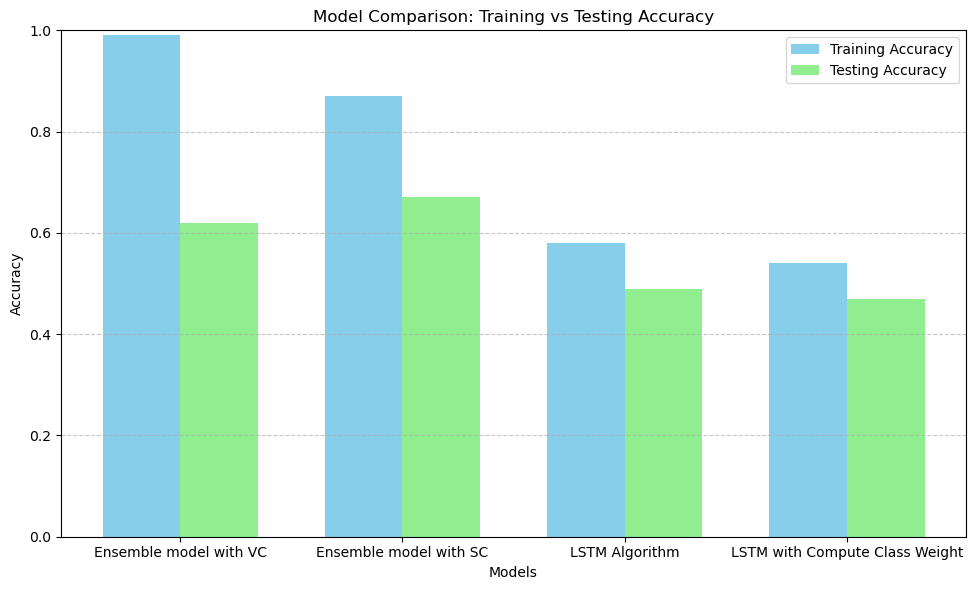

In [29]:
import matplotlib.pyplot as plt

models = ['Ensemble model with VC', 'Ensemble model with SC', 'LSTM Algorithm', 'LSTM with Compute Class Weight']
train_accuracies = [0.99, 0.87, 0.58, 0.54] 
test_accuracies = [0.62, 0.67, 0.49, 0.47]  

x = range(len(models))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, train_accuracies, width=width, label='Training Accuracy', color='skyblue')
plt.bar([i + width for i in x], test_accuracies, width=width, label='Testing Accuracy', color='lightgreen')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Training vs Testing Accuracy')
plt.xticks([i + width / 2 for i in x], models)
plt.ylim(0, 1)  
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [30]:
import pickle

with open('stacked_model.pkl', 'wb') as f:
    pickle.dump(stacked_model, f)


In [34]:
x_test

NameError: name 'x_test' is not defined

In [38]:
import pickle

# Load the model
with open('stacked_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

sample_input = [[0,2,2,1,0,1,1,2,1,0,1,2,1,2,4,1,0,0]]  

# Make prediction
output = loaded_model.predict(sample_input)

print("Model Prediction:", output)


Model Prediction: [8]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)


y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [32]:
X_test

,age,speak_verbally,follow_instruction,maintain_interaction,socialize_other_children,eye_contact,role_playing,facial_expression,understand_others_feeling,look_at_pointed_toys,respond_when_called,keep_attention,interest_in_gadget,behaviour,parents_objective_1,gender_1,level_ASD_1,level_ASD_2
9,0,0,2,2,2,2,2,2,0,2,2,2,2,4,1,1,1,0
184,0,2,2,1,0,1,1,2,1,0,1,2,1,2,4,1,0,0
120,0,2,2,2,2,2,2,2,2,2,2,2,1,1,4,1,0,0
207,0,2,2,1,1,1,1,1,2,0,1,2,1,2,4,1,0,0
148,0,0,2,0,2,1,2,2,2,2,2,0,2,1,10,1,0,0
214,0,2,1,1,1,2,1,1,2,0,0,2,1,2,4,1,0,0
182,0,0,1,0,0,0,1,1,1,0,1,0,1,2,4,1,0,0
86,0,0,0,0,0,0,2,2,2,2,2,0,2,4,0,1,1,0
178,0,1,2,2,2,0,0,0,2,2,2,0,2,4,7,1,1,0
175,0,0,2,2,2,1,0,2,0,2,2,2,2,4,10,1,0,0


In [33]:
import shap

# Initialize the TreeExplainer
explainer = shap.TreeExplainer(rf)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Define feature names
feature_names = [
    "socialize_other_children",
    "respond_when_called",
    "age",
    "keep_attention",
    "follow_instruction",
    "role_playing",
    "behaviour",
    "speak_verbally",
    "understand_others_feeling",
    "maintain_interaction",
    "look_at_pointed_toys",
    "facial_expression",
    "parents_objective_1",
    "level_ASD_1",
    "level_ASD_2",
    "eye_contact",
    "gender"
]

X_test_df = pd.DataFrame(X_test, columns=feature_names)

shap.summary_plot(shap_values[1], X_test_df)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
import shap
import pandas as pd

# Assuming 'model' is your trained RandomForestClassifier
# and 'X_test' is your test dataset

# Convert X_test to a DataFrame if it's not already
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=feature_names)

# Initialize the SHAP Explainer
explainer = shap.Explainer(stacked_model, X_test)

# Compute SHAP values
shap_values = explainer(X_test)

# Generate the summary plot
shap.summary_plot(shap_values, X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import eli5
from eli5.sklearn import explain_weights

from sklearn.model_selection import cross_val_predict
import numpy as np

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svm.fit(X_train, y_train)


rf_probs = rf.predict_proba(X_train)[:, 1]
xgb_probs = xgb.predict_proba(X_train)[:, 1]
svm_probs = svm.predict_proba(X_train)[:, 1]

meta_features = np.column_stack((rf_probs, xgb_probs, svm_probs))

meta_clf = LogisticRegression()
meta_clf.fit(meta_features, y_train)

eli5.show_weights(meta_clf, feature_names=['rf_prob', 'xgb_prob', 'svm_prob'])

In [ ]:
import eli5
from IPython.display import display

display(eli5.show_weights(meta_clf, feature_names=['rf_prob', 'xgb_prob', 'svm_prob']))


In [ ]:
import shap
import matplotlib.pyplot as plt

feature_names = ['rf_prob', 'xgb_prob', 'svm_prob']

explainer = shap.Explainer(meta_clf, meta_features)
shap_values = explainer(meta_features)

import shap
import matplotlib.pyplot as plt


class_idx = 1  
shap_values_class = shap_values[:, class_idx, :]  

shap_explanation = shap.Explanation(
    values=shap_values_class,
    base_values=explainer.expected_value[class_idx],
    data=meta_features,
    feature_names=feature_names
)

shap.plots.bar(shap_explanation)

print(shap_values)
print(f"Number of features in meta_features: {meta_features.shape[1]}")
print(f"Feature names provided: {feature_names}")
print(f"Length of feature_names: {len(feature_names)}")

shap.summary_plot(shap_values_class, meta_features, feature_names=feature_names)


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
class_names = ['Class 0', 'Class 1']  

explainer = LimeTabularExplainer(X_train, feature_names=feature_names, class_names=class_names, mode='classification')
exp = explainer.explain_instance(X_test[0], model.predict_proba)
exp.show_in_notebook()